In [1]:
import os
import json
from pathlib import Path
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('./fit_df_no_likelihoods.csv')
df.head()

,Unnamed: 0,lightcurve,true_model,lightcurve_path,true_params,true_lightcurve,fit_model,fit_path,t_max,residual,best_fit_params,best_fit_lightcurve
0,0,Bu2019lm_00000,Bu2019lm,./model-recovery-injections/lc_Bu2019lm_00000....,"{'simulation_id': 0, 'luminosity_distance': 9....","{'sample_times': {0: 0.1, 1: 0.6, 2: 1.1, 3: 1...",Bu2019lm,./model-recovery-fits/lc_Bu2019lm_00000/Bu2019...,21.0,2.396171,"{'luminosity_distance': 1.4261876552293724, 'K...","{'ztfg': {0: 13.94600034679428, 1: 10.23964754..."
1,1,Bu2019lm_00000,Bu2019lm,./model-recovery-injections/lc_Bu2019lm_00000....,"{'simulation_id': 0, 'luminosity_distance': 9....","{'sample_times': {0: 0.1, 1: 0.6, 2: 1.1, 3: 1...",Piro2021,./model-recovery-fits/lc_Bu2019lm_00000/Piro20...,21.0,85.695696,"{'luminosity_distance': 0.787195211656292, 'ti...","{'ztfg': {0: 13.868197586557052, 1: 12.5699259..."
2,2,Bu2019lm_00000,Bu2019lm,./model-recovery-injections/lc_Bu2019lm_00000....,"{'simulation_id': 0, 'luminosity_distance': 9....","{'sample_times': {0: 0.1, 1: 0.6, 2: 1.1, 3: 1...",TrPi2018,./model-recovery-fits/lc_Bu2019lm_00000/TrPi20...,21.0,77.369740,"{'luminosity_distance': 163.4987987794598, 'ti...","{'ztfg': {0: 21.61523669151645, 1: 13.09817624..."
3,3,Bu2019lm_00000,Bu2019lm,./model-recovery-injections/lc_Bu2019lm_00000....,"{'simulation_id': 0, 'luminosity_distance': 9....","{'sample_times': {0: 0.1, 1: 0.6, 2: 1.1, 3: 1...",nugent-hyper,./model-recovery-fits/lc_Bu2019lm_00000/nugent...,21.0,289.371544,"{'luminosity_distance': 170.87965577399387, 't...","{'ztfg': {0: 20.566038089279566, 1: 18.6206599..."
4,4,Bu2019lm_00001,Bu2019lm,./model-recovery-injections/lc_Bu2019lm_00001....,"{'simulation_id': 0, 'luminosity_distance': 9....","{'sample_times': {0: 0.1, 1: 0.6, 2: 1.1, 3: 1...",Bu2019lm,./model-recovery-fits/lc_Bu2019lm_00001/Bu2019...,21.0,1.170782,"{'luminosity_distance': 7.3782245914517155, 'K...","{'ztfg': {0: 18.12942755281373, 1: 14.90332886..."


In [3]:
lightcurves = df['lightcurve'].unique()

In [4]:
true_model = []
for lightcurve in lightcurves:
    ## include the indices of the rows in df that have the same lightcurve name
    sub_df = df[df['lightcurve'] == lightcurve]
    ## find row in sub_df with lowest residual value and append a tuple of the (true_model, fit_model) to the true_model list
    lowest_residual_row = sub_df[sub_df['residual'] == sub_df['residual'].min()]
    true_model.append((lowest_residual_row['lightcurve'].values[0], lowest_residual_row['true_model'].values[0], lowest_residual_row['fit_model'].values[0], lowest_residual_row['Unnamed: 0'].values[0]))

In [5]:
true_model

[('Bu2019lm_00000', 'Bu2019lm', 'Bu2019lm', 0),
 ('Bu2019lm_00001', 'Bu2019lm', 'Bu2019lm', 4),
 ('Bu2019lm_00002', 'Bu2019lm', 'Bu2019lm', 8),
 ('Bu2019lm_00003', 'Bu2019lm', 'Bu2019lm', 12),
 ('Bu2019lm_00004', 'Bu2019lm', 'Bu2019lm', 16),
 ('Bu2019lm_00005', 'Bu2019lm', 'Bu2019lm', 20),
 ('Bu2019lm_00006', 'Bu2019lm', 'Piro2021', 24),
 ('Bu2019lm_00007', 'Bu2019lm', 'Bu2019lm', 27),
 ('Bu2019lm_00008', 'Bu2019lm', 'Piro2021', 31),
 ('Bu2019lm_00009', 'Bu2019lm', 'Piro2021', 34),
 ('Bu2019lm_00010', 'Bu2019lm', 'Bu2019lm', 37),
 ('Bu2019lm_00011', 'Bu2019lm', 'Bu2019lm', 41),
 ('Bu2019lm_00012', 'Bu2019lm', 'Bu2019lm', 45),
 ('Bu2019lm_00013', 'Bu2019lm', 'Bu2019lm', 49),
 ('Bu2019lm_00014', 'Bu2019lm', 'Bu2019lm', 53),
 ('Bu2019lm_00015', 'Bu2019lm', 'Bu2019lm', 57),
 ('Bu2019lm_00016', 'Bu2019lm', 'Bu2019lm', 61),
 ('Bu2019lm_00017', 'Bu2019lm', 'Bu2019lm', 65),
 ('Bu2019lm_00018', 'Bu2019lm', 'Bu2019lm', 69),
 ('Bu2019lm_00019', 'Bu2019lm', 'Bu2019lm', 73),
 ('Bu2019lm_00020', 'Bu

In [6]:
mismatched_models = []
for item in true_model:
    if item[1] != item[2]:
        mismatched_models.append(item)

In [7]:
mm_df = pd.DataFrame(mismatched_models, columns=['lightcurve', 'true_model', 'fit_model', 'index'])
mm_df.head()

,lightcurve,true_model,fit_model,index
0,Bu2019lm_00006,Bu2019lm,Piro2021,24
1,Bu2019lm_00008,Bu2019lm,Piro2021,31
2,Bu2019lm_00009,Bu2019lm,Piro2021,34
3,Bu2019lm_00025,Bu2019lm,Piro2021,98
4,Bu2019lm_00042,Bu2019lm,Piro2021,165


In [8]:
## calculate the rate of mismatched models for each model in the true_model list (there are 100 lightcurves for each model)
for model in mm_df['true_model'].unique():
    sub_df = mm_df[mm_df['true_model'] == model]
    print(model, len(sub_df)/100)

print()
print()

for model in mm_df['true_model'].unique():
    sub_df = mm_df[mm_df['true_model'] == model]
    print(model)
    for fit_model in sub_df['fit_model'].unique():
        sub_sub_df = sub_df[sub_df['fit_model'] == fit_model]
        print(fit_model, len(sub_sub_df)/len(sub_df))
    print()

Bu2019lm 0.08
Piro2021 0.04
TrPi2018 0.32
nugent-hyper 0.08


Bu2019lm
Piro2021 1.0

Piro2021
nugent-hyper 0.5
TrPi2018 0.5

TrPi2018
Piro2021 0.75
Bu2019lm 0.1875
nugent-hyper 0.0625

nugent-hyper
Piro2021 1.0



In [10]:
## get a pandas dataframe of the rows in the df where 'unnamed: 0' is in the index column of mm_df
mm_df_indices = mm_df['index'].unique()
mm_df_indices = mm_df_indices.astype(int)
mm_df_indices = mm_df_indices.tolist()

mm_df2 = df[df['Unnamed: 0'].isin(mm_df_indices)]
mm_df2.head()

,Unnamed: 0,lightcurve,true_model,lightcurve_path,true_params,true_lightcurve,fit_model,fit_path,t_max,residual,best_fit_params,best_fit_lightcurve
24,24,Bu2019lm_00006,Bu2019lm,./model-recovery-injections/lc_Bu2019lm_00006....,"{'simulation_id': 0, 'luminosity_distance': 7....","{'sample_times': {0: 0.1, 1: 0.6, 2: 1.1, 3: 1...",Piro2021,./model-recovery-fits/lc_Bu2019lm_00006/Piro20...,21.0,12.500134,"{'luminosity_distance': 0.6602234113593531, 't...","{'ztfg': {0: 13.515403324236534, 1: 13.7718378..."
31,31,Bu2019lm_00008,Bu2019lm,./model-recovery-injections/lc_Bu2019lm_00008....,"{'simulation_id': 0, 'luminosity_distance': 3....","{'sample_times': {0: 0.1, 1: 0.6, 2: 1.1, 3: 1...",Piro2021,./model-recovery-fits/lc_Bu2019lm_00008/Piro20...,21.0,38.518978,"{'luminosity_distance': 0.3044258715181971, 't...","{'ztfg': {0: 13.101779211050673, 1: 12.1936643..."
34,34,Bu2019lm_00009,Bu2019lm,./model-recovery-injections/lc_Bu2019lm_00009....,"{'simulation_id': 0, 'luminosity_distance': 5....","{'sample_times': {0: 0.1, 1: 0.6, 2: 1.1, 3: 1...",Piro2021,./model-recovery-fits/lc_Bu2019lm_00009/Piro20...,21.0,13.929687,"{'luminosity_distance': 0.9302158466946624, 't...","{'ztfg': {0: 13.543226405555309, 1: 13.0874149..."
98,98,Bu2019lm_00025,Bu2019lm,./model-recovery-injections/lc_Bu2019lm_00025....,"{'simulation_id': 0, 'luminosity_distance': 7....","{'sample_times': {0: 0.1, 1: 0.6, 2: 1.1, 3: 1...",Piro2021,./model-recovery-fits/lc_Bu2019lm_00025/Piro20...,21.0,12.418852,"{'luminosity_distance': 0.6287321261247577, 't...","{'ztfg': {0: 13.450775137153059, 1: 13.3255601..."
165,165,Bu2019lm_00042,Bu2019lm,./model-recovery-injections/lc_Bu2019lm_00042....,"{'simulation_id': 0, 'luminosity_distance': 3....","{'sample_times': {0: 0.1, 1: 0.6, 2: 1.1, 3: 1...",Piro2021,./model-recovery-fits/lc_Bu2019lm_00042/Piro20...,21.0,14.775156,"{'luminosity_distance': 0.0473621826098974, 't...","{'ztfg': {0: 13.279477388291308, 1: 12.6559974..."


In [55]:
## use the true_lightcurve column and the best_fit_lightcurve column to plot all lightcurves with Bu2019lm as the true model
import matplotlib.pyplot as plt
import seaborn as sns

# bu2019lm_df = mm_df2[mm_df2['true_model'] == 'Bu2019lm']
# bu2019lm_df.head()

# # fig, ax = plt.subplots(figsize=(10, 10))

# # for lightcurve in bu2019lm_df['lightcurve'].unique():
# #     sub_df = bu2019lm_df[bu2019lm_df['lightcurve'] == lightcurve]
# #     true_lightcurve = sub_df['true_lightcurve'].values[0]

# for lc in bu2019lm_df.lightcurve.unique():
#     print(lc)
#     lc_row = bu2019lm_df[bu2019lm_df['lightcurve'] == lc]
#     true_lc = pd.DataFrame(lc_row['true_lightcurve'])
#     # time = true_lc['sample_times']
#     print(true_lc)


{'sample_times': {0: 0.1, 1: 0.6, 2: 1.1, 3: 1.6, 4: 2.1, 5: 2.6, 6: 3.1, 7: 3.6, 8: 4.1, 9: 4.6, 10: 5.1, 11: 5.6, 12: 6.1, 13: 6.6, 14: 7.1, 15: 7.6, 16: 8.1, 17: 8.6, 18: 9.1, 19: 9.6, 20: 10.1, 21: 10.6, 22: 11.1, 23: 11.6, 24: 12.1, 25: 12.6, 26: 13.1, 27: 13.6, 28: 14.1, 29: 14.6, 30: 15.1, 31: 15.6, 32: 16.1, 33: 16.6, 34: 17.1, 35: 17.6, 36: 18.1, 37: 18.6, 38: 19.1, 39: 19.6, 40: 20.1}, 'ztfg': {0: 19.041366013255843, 1: 14.676829440974895, 2: 14.411534948849296, 3: 14.961523902876003, 4: 16.234686249186495, 5: 17.3678917543167, 6: 18.411093334212264, 7: 18.98789343226489, 8: 19.635507085569824, 9: 20.294402601314268, 10: 20.935307682525238, 11: 21.248499536900386, 12: 21.644084938642926, 13: 22.502387051936026, 14: 22.570876630506532, 15: inf, 16: inf, 17: inf, 18: inf, 19: inf, 20: inf, 21: inf, 22: inf, 23: inf, 24: inf, 25: inf, 26: inf, 27: inf, 28: inf, 29: inf, 30: inf, 31: inf, 32: inf, 33: inf, 34: inf, 35: inf, 36: inf, 37: inf, 38: inf, 39: inf, 40: inf}, 'ztfg_err'

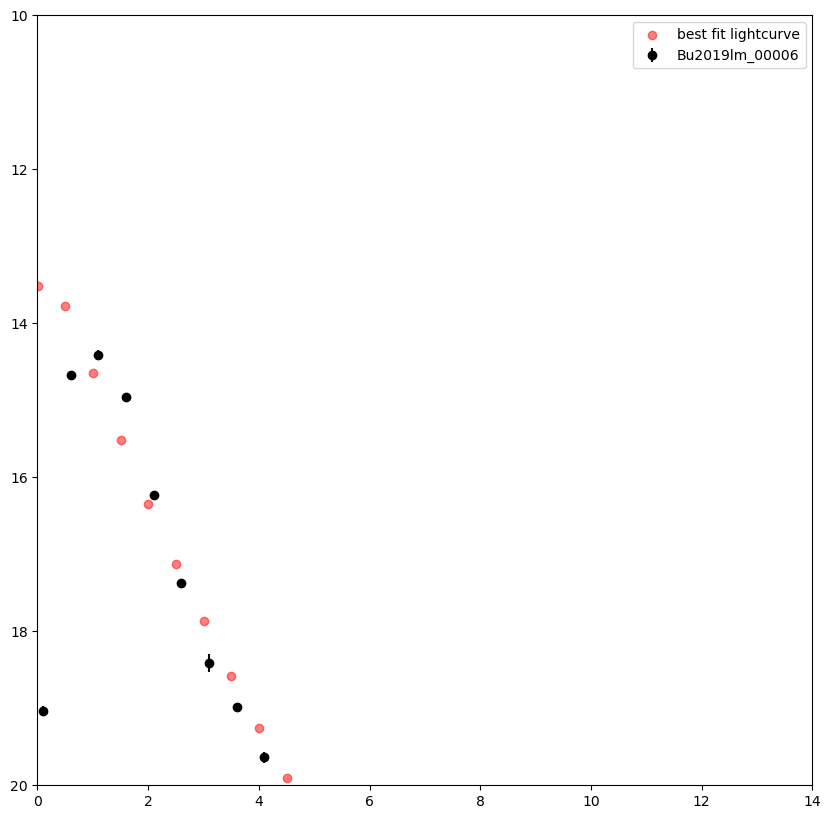

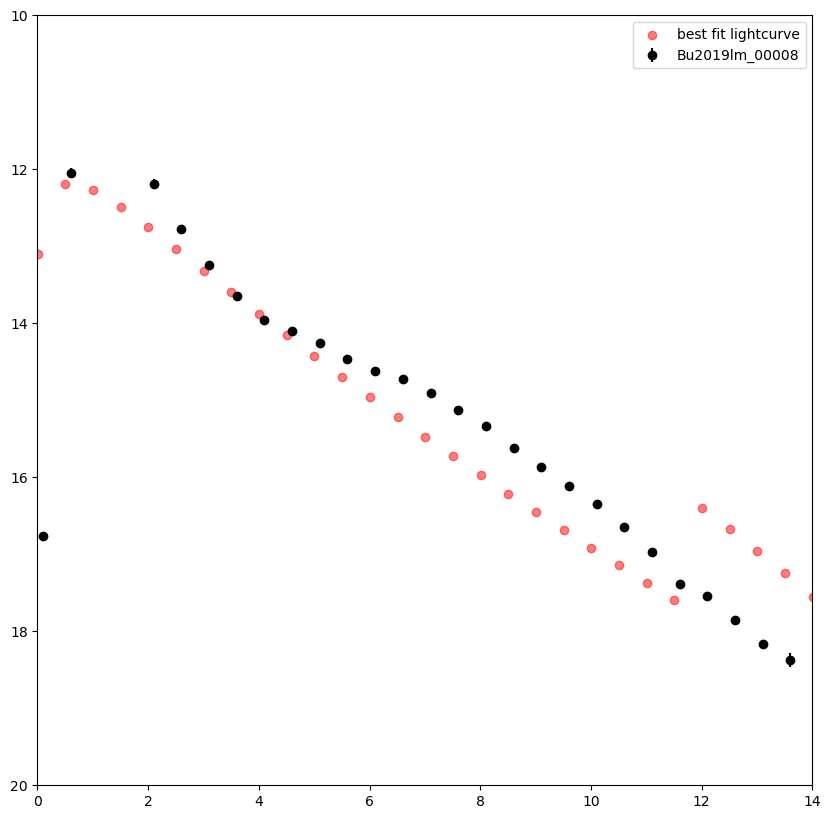

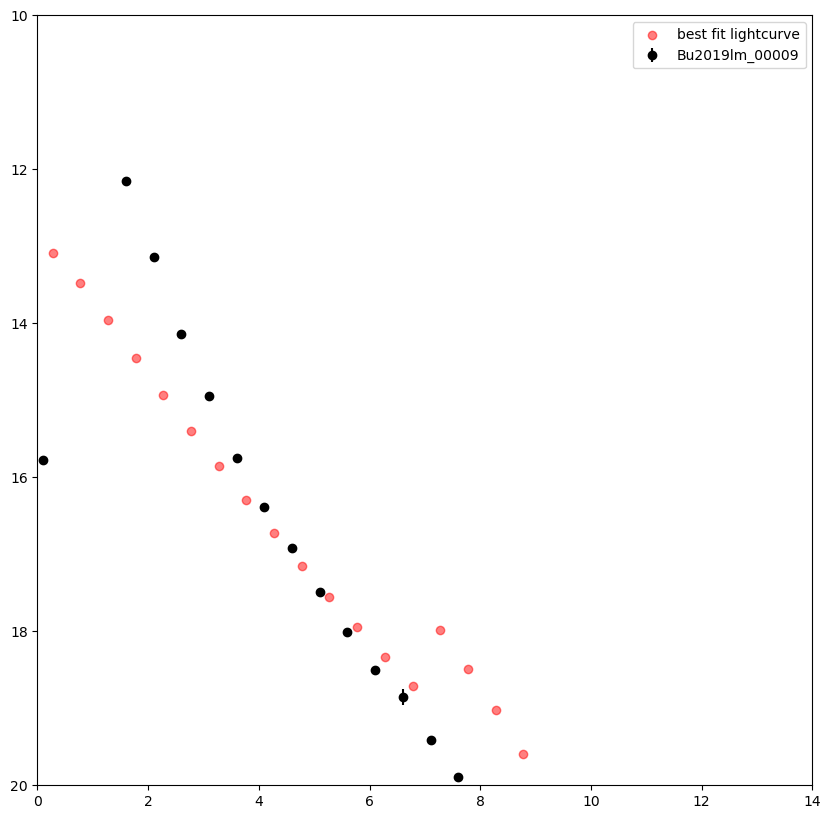

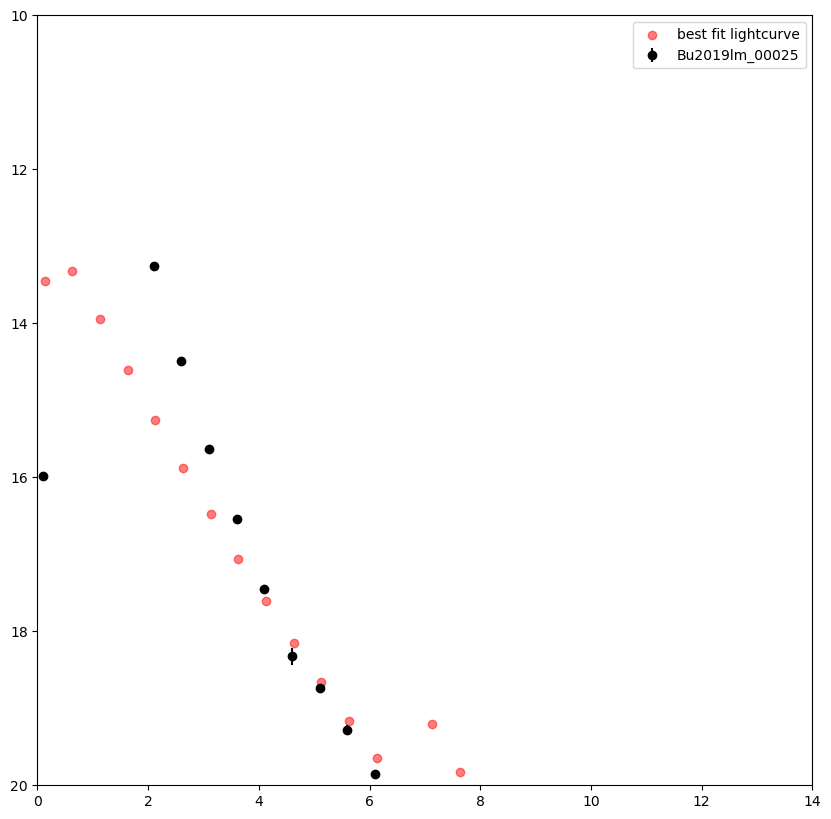

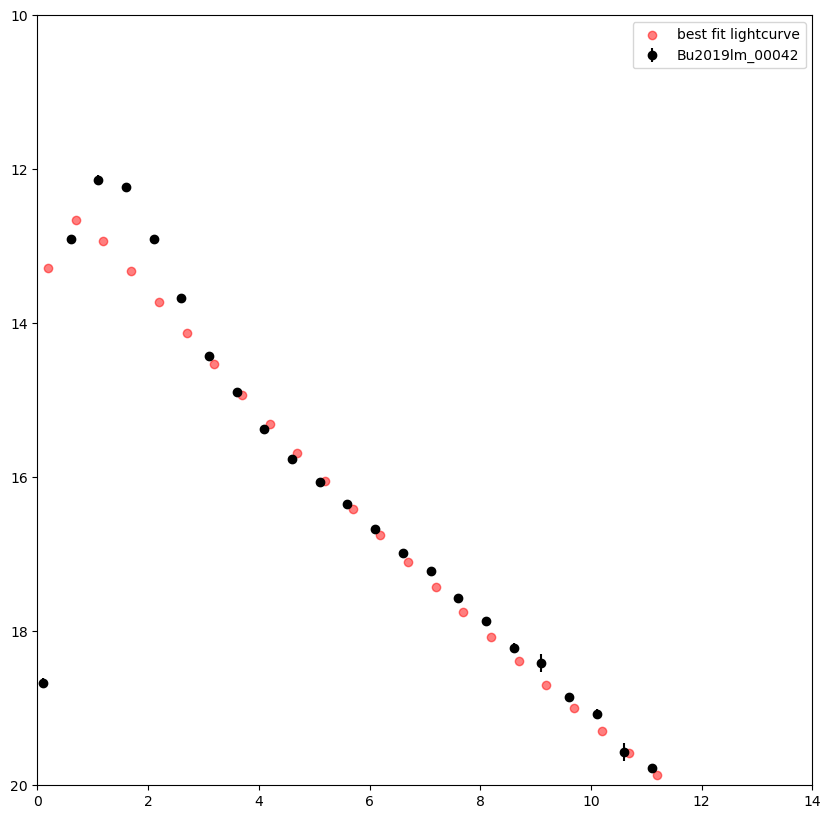

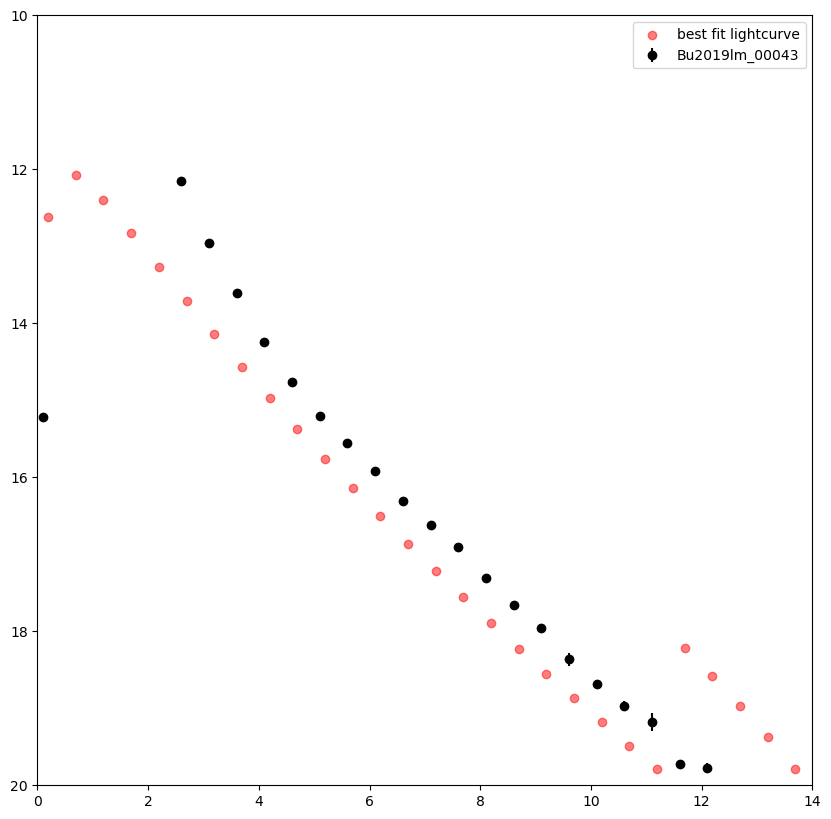

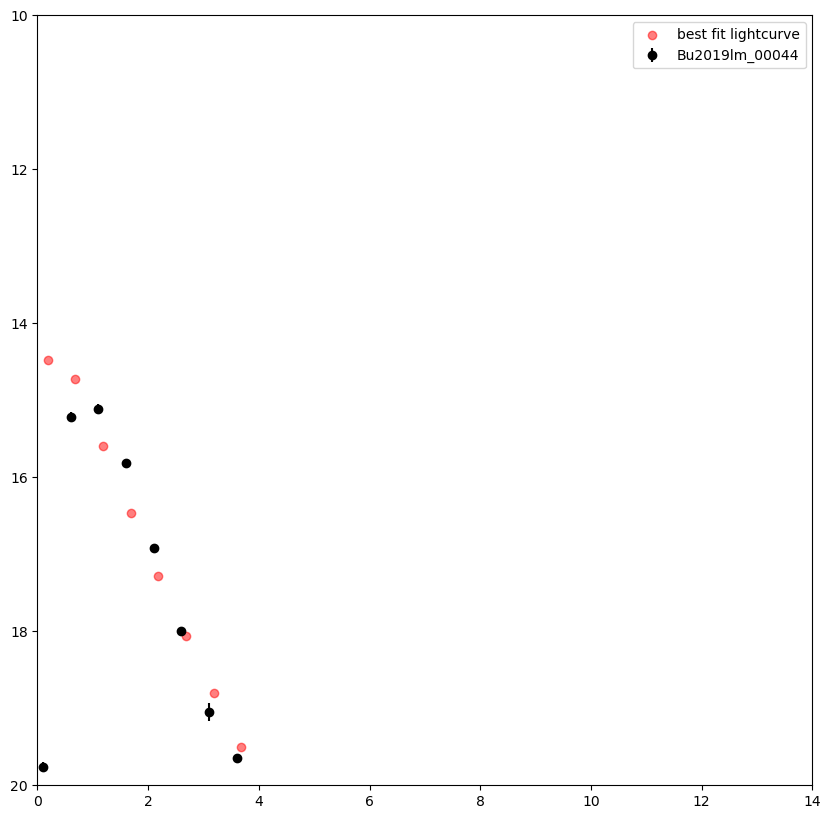

In [82]:
inf = np.inf

print(mm_df2.iloc[0]['true_lightcurve'])
for i in range(0,7):
## turn mm_df2.iloc[0]['true_lightcurve'] into a dict
    true_lc = eval(mm_df2.iloc[i]['true_lightcurve'])
    best_fit_lc = eval(mm_df2.iloc[i]['best_fit_lightcurve'])

    # print(true_lc)
    # print(best_fit_lc)
    # list(true_lc['ztfg'].values())


    ## use the true_lc and best_fit_lc dicts to plot the lightcurve
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.errorbar(list(true_lc['sample_times'].values()), list(true_lc['ztfg'].values()), yerr=list(true_lc['ztfg_err'].values()), fmt='o', color='black', label=f"{mm_df2.iloc[i]['lightcurve']}")
    ax.scatter(np.array(list(best_fit_lc['bestfit_sample_times'].values()))+0.1, list(best_fit_lc['ztfg'].values()), color='red',alpha=0.5, label='best fit lightcurve')
    ## find at what index the true lightcurve honly has inf values after (there may be inf values at the start but this should not be the index used)
    ax.legend()
    tmax_idx = np.where(np.array(list(true_lc['ztfg'].values())) == inf)[0][1]
    tmax = list(true_lc['sample_times'].values())[tmax_idx]
    
    ax.set_xlim(0, 14)
    ax.set_ylim(20,10)

    
    plt.show()